In [1]:
import findspark

In [2]:
findspark.init()

In [3]:
import pyspark

In [4]:
sc = pyspark.SparkContext("local")

In [7]:
lines = sc.textFile("C://spark/data/review.txt")

In [8]:
lines.take(5)

['����� ������ �ǽ��ϰ� ����.',
 '',
 '���ָ� �� �˷����� ���� ���� ĳ�����Ѱ� ���� Ź���߽��ϴ�! ��¥ �Ϻ����� �����ϴ� �� ������ ������ ���Ⱑ ���� ���ҳ\u05ff�! ���� ���� ��¥ ������ ���� ���Ǵ� ����Դϴ�!',
 '',
 '']

### Window에서 Spark 한글 처리 프로그램
- Text 파일의 한글을 Unicode로 못읽음
- SparkSession의 read 함수에서 "csv" 형식으로 읽어들어야 함.
    - Spark Session에서 txt 파일을 csv 형식으로 읽어 dataframe을 생성
        - encoding option : "EUC-kr"
        - 분리자("sep")를 라인("\n")으로 설정하여 한라인씩 분리하여 읽음

In [13]:
linesDF = spark.read.format("csv").option("encoding","EUC-kr") \
.option("sep","\n") \
.load("C://spark/data/review.txt")

In [14]:
linesDF.take(5)

[Row(_c0='배우의 국적을 의심하게 만듬.'),
 Row(_c0='여주를 잘 알려지지 않은 배우로 캐스팅한게 정말 탁월했습니다! 진짜 일본인이 연기하는 줄 착각할 정도로 연기가 정말 좋았네요! 최희서 배우님 진짜 앞으로 더욱 기대되는 배우입니다!'),
 Row(_c0='역사를 잊은 민족에게 미래는 없다'),
 Row(_c0='이제훈은 진짜 연기잘한다'),
 Row(_c0='리얼볼바엔 그냥 이거 7번 보는게 더 재밌음')]

- DataFrame을 rdd로 변환
    - DataFrame은 .map 등의 함수를 사용할 수 없음
        - 바로 변환하면 row들의 DataSet이 만들어짐
            - row에 대해서는 re.split와 같은 문자열 변환함수를 적용할 수 없음.
        - 각 row를 변환해서 String들의 DataSet을 만들어주어야 함.

In [15]:
import re

In [17]:
linesRDD = linesDF.rdd

In [21]:
linesRDD.take(3)

[Row(_c0='배우의 국적을 의심하게 만듬.'),
 Row(_c0='여주를 잘 알려지지 않은 배우로 캐스팅한게 정말 탁월했습니다! 진짜 일본인이 연기하는 줄 착각할 정도로 연기가 정말 좋았네요! 최희서 배우님 진짜 앞으로 더욱 기대되는 배우입니다!'),
 Row(_c0='역사를 잊은 민족에게 미래는 없다')]

In [31]:
top20Words = linesRDD.map(lambda line: line[0]) \
.flatMap(lambda line: re.split("\W+", line))    \
.filter(lambda word: len(word) > 0 )            \
.map(lambda word: (word, 1))                    \
.reduceByKey(lambda v1, v2: v1 + v2)            \
.sortBy(lambda wc: wc[1], False)               \
.take(20)

In [33]:
top20Words

[('영화', 1346),
 ('너무', 898),
 ('정말', 698),
 ('진짜', 536),
 ('잘', 518),
 ('연기', 493),
 ('더', 342),
 ('박열', 332),
 ('연기가', 329),
 ('이제훈', 312),
 ('꼭', 285),
 ('수', 277),
 ('배우들', 273),
 ('배우들의', 271),
 ('역사를', 260),
 ('영화를', 259),
 ('이', 255),
 ('연기도', 250),
 ('이준익', 219),
 ('그', 213)]

In [34]:
import matplotlib.pyplot as plt

In [35]:
x = []
y = []

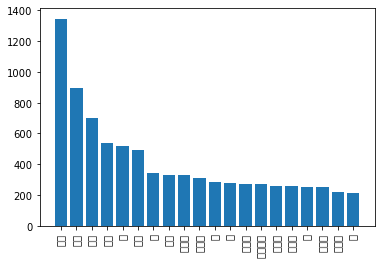

In [37]:
for (w, c) in top20Words:
    x.append(w)
    y.append(c)
plt.bar(x, y)
plt.xticks(rotation="vertical")
plt.show()

In [38]:
from matplotlib import font_manager

In [39]:
fontprop = font_manager.FontProperties(fname="C://NanumBarunGothic.ttf")

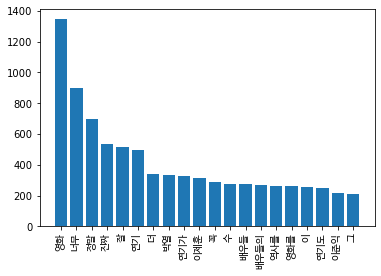

In [40]:
for (w, c) in top20Words:
    x.append(w)
    y.append(c)
plt.bar(x, y)
plt.xticks(rotation="vertical",fontproperties=fontprop)
plt.show()